In [21]:
from sklearn.datasets import load_files
import pandas as pd
import numpy as np
import re, string, unicodedata
import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import os

In [22]:
os.getcwd()

'C:\\Users\\sunilchawla\\Desktop\\ass2\\code'

In [23]:
path = "../data_clean/"

In [24]:
df_train = pd.read_csv(path+"pos_neg.csv",sep = ",")
df_test = pd.read_csv(path+"pos_neg_test.csv",sep = ",")
df_train.drop(['words','Unnamed: 0'], axis = 1, inplace = True)
df_test.drop(['words','Unnamed: 0'], axis = 1, inplace = True)

In [25]:
df_train.head()

movieID                                             review  rate  label  \
0        0  story of a man who has unnatural feelings for ...     3      0   
1    10000  airport '77 starts as a brand new luxury 747 p...     4      0   
2    10001  this film lacked something i could not put my ...     4      0   
3    10002  sorry everyone,,, i know this is supposed to b...     1      0   
4    10003  when i was little my parents took me along to ...     1      0   

                                          words_sent  
0  story man unnatural feeling pig start opening ...  
1  airport '77 start brand new luxury 747 plane l...  
2  film lacked something could not put finger fir...  
3  sorry everyone know supposed  art  film wow ha...  
4  little parent took along theater see interior ...

In [26]:
df_test.head()

movieID                                             review  rate  label  \
0        0  once again mr. costner has dragged out a movie...     2      0   
1    10000  this is an example of why the majority of acti...     4      0   
2    10001  first of all i hate those moronic rappers, who...     1      0   
3    10002  not even the beatles could write songs everyon...     3      0   
4    10003  brass pictures (movies is not a fitting word f...     3      0   

                                          words_sent  
0  again mr. costner dragged movie far longer nec...  
1  example majority action film generic boring re...  
2  first all hate moronic rapper could'nt act gun...  
3  not even beatles could write song everyone lik...  
4  brass picture movie not fitting word really so...

In [27]:
import nltk
import string
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
from gensim.models import Word2Vec
train_corpus = df_train['words_sent'].tolist()
test_corpus = df_test['words_sent'].tolist()
comments = train_corpus + test_corpus
tok_comments = [nltk.word_tokenize(sent) for sent in comments]

In [55]:
model = Word2Vec(tok_comments, size = 64, min_count = 1, negative = 5)

2018-10-15 15:04:50,921 : INFO : collecting all words and their counts
2018-10-15 15:04:50,921 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-10-15 15:04:51,375 : INFO : PROGRESS: at sentence #10000, processed 1252945 words, keeping 70541 word types
2018-10-15 15:04:51,790 : INFO : PROGRESS: at sentence #20000, processed 2533136 words, keeping 109060 word types
2018-10-15 15:04:52,205 : INFO : PROGRESS: at sentence #30000, processed 3789443 words, keeping 140781 word types
2018-10-15 15:04:52,589 : INFO : PROGRESS: at sentence #40000, processed 5040107 words, keeping 169872 word types
2018-10-15 15:04:52,974 : INFO : collected 196537 word types from a corpus of 6298317 raw words and 50000 sentences
2018-10-15 15:04:52,974 : INFO : Loading a fresh vocabulary
2018-10-15 15:04:54,575 : INFO : min_count=1 retains 196537 unique words (100% of original 196537, drops 0)
2018-10-15 15:04:54,575 : INFO : min_count=1 leaves 6298317 word corpus (100% of original 6

In [56]:
word_vectors = model.wv
len(word_vectors.vocab)

196537

In [57]:
embeddings_index = {}
for w in model.wv.vocab.keys():
    embeddings_index[w] = model.wv[w]

In [58]:
embeddings_index

{'story': array([ 2.1407642 ,  1.1248322 , -3.1144657 ,  1.9573865 , -1.1967188 ,
        -1.9627367 ,  3.090299  , -0.09150407,  2.1679509 ,  0.45840833,
        -2.0435436 ,  1.6425291 , -1.1891506 , -2.6837602 , -2.1277769 ,
         3.2435813 , -4.3271813 ,  1.6219242 , -0.26620632,  0.15872215,
         0.959082  ,  1.0873564 , -2.0392535 , -1.128986  ,  0.6039536 ,
        -2.0071216 ,  2.1089203 , -0.4271575 ,  0.7392863 , -0.40745243,
        -2.1341288 ,  0.58204335, -0.49438354, -0.37652773,  1.320938  ,
        -0.30713618, -1.2570704 , -1.4893312 ,  1.3006563 ,  3.2436347 ,
         1.8205583 , -0.6025549 ,  0.02548075,  1.2041204 , -0.9929069 ,
        -0.08695065, -2.31387   ,  1.975179  , -0.8435497 ,  2.3595912 ,
        -3.1813138 ,  1.5918195 ,  0.8286648 , -0.14386058,  2.3700724 ,
         5.291029  ,  0.4199211 ,  0.2509392 , -1.2642738 ,  1.6972923 ,
        -0.59400284,  0.53222597, -5.7802143 , -0.5831484 ], dtype=float32),
 'man': array([ 1.2024138 ,  1.5979972

In [59]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [60]:
tokenizer = Tokenizer(nb_words=None)
tokenizer.fit_on_texts(comments)

In [61]:
train_sequences = tokenizer.texts_to_sequences(df_train['words_sent'])
test_sequences = tokenizer.texts_to_sequences(df_test['words_sent'])

In [62]:
test_sequences

[[93,
  333,
  6614,
  3224,
  2,
  141,
  1044,
  1612,
  1045,
  1220,
  1390,
  1798,
  320,
  12,
  91,
  1,
  307,
  11,
  30,
  74,
  938,
  3712,
  6614,
  4,
  11,
  1549,
  315,
  1407,
  23,
  220,
  9,
  1,
  307,
  11,
  20,
  307,
  12,
  8843,
  32385,
  9201,
  8628,
  200,
  61,
  143,
  37,
  59,
  164,
  240,
  109,
  31,
  14,
  1367,
  15830,
  3712,
  5714,
  635,
  1585,
  56,
  6614,
  329,
  21,
  415,
  215,
  32,
  97,
  3283,
  6614,
  180,
  74,
  6,
  8628,
  4,
  938,
  471,
  8628,
  1977,
  54,
  14,
  2397,
  13747,
  10428,
  14,
  1234,
  6,
  24,
  206,
  1486,
  224],
 [326,
  2107,
  110,
  3,
  3639,
  270,
  20,
  88,
  195,
  76,
  500,
  348,
  1076,
  13005,
  417,
  1698,
  872,
  1698,
  4515,
  12124,
  45,
  9,
  56,
  2046,
  52,
  52,
  21,
  1,
  1057,
  5,
  39,
  19,
  90,
  552,
  408,
  24771,
  41,
  90,
  738,
  5750,
  1698,
  872,
  17744,
  2687,
  2453,
  1890,
  2696,
  2231,
  1698,
  4515,
  19,
  73,
  503,
  1698,
  872,


In [63]:
pad_test_seq = pad_sequences(test_sequences, maxlen=400,padding='pre', truncating = 'pre')

In [64]:
pad_train_seq = pad_sequences(train_sequences, maxlen=400,padding='pre',truncating = 'pre')

In [65]:
pad_train_seq

array([[    0,     0,     0, ...,  7598,    46,  3007],
       [ 4309,  6223,   134, ...,  3540, 19540,  4333],
       [    0,     0,     0, ...,  2132,   591,  1379],
       ...,
       [    0,     0,     0, ...,  1019,   117,  7557],
       [    0,     0,     0, ...,  7931,  1811,    21],
       [    0,     0,     0, ...,    20,  2287,    32]])

In [66]:
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 64))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [67]:
tokenizer.word_index.items()

dict_items([('not', 1), ('movie', 2), ('film', 3), ("'s", 4), ('one', 5), ('all', 6), ('like', 7), ('would', 8), ('time', 9), ('good', 10), ('character', 11), ('very', 12), ('up', 13), ('no', 14), ('story', 15), ('even', 16), ('get', 17), ('make', 18), ('see', 19), ('really', 20), ('well', 21), ('scene', 22), ('much', 23), ('could', 24), ('bad', 25), ('people', 26), ('great', 27), ('also', 28), ('first', 29), ('most', 30), ('show', 31), ('way', 32), ('thing', 33), ('made', 34), ('life', 35), ('too', 36), ('think', 37), ('the', 38), ('go', 39), ('know', 40), ('watch', 41), ('love', 42), ('two', 43), ('plot', 44), ('many', 45), ('seen', 46), ('actor', 47), ('year', 48), ('say', 49), ('never', 50), ('end', 51), ('acting', 52), ('look', 53), ('best', 54), ('little', 55), ('over', 56), ('ever', 57), ('man', 58), ('better', 59), ('take', 60), ('come', 61), ('work', 62), ('still', 63), ('part', 64), ('something', 65), ('find', 66), ('director', 67), ('want', 68), ('give', 69), ('back', 70), (

In [68]:
embeddings_index.get('movie')

array([ 0.14799492, -1.5859044 , -0.81806695,  1.8682747 , -2.0779526 ,
        0.5277518 , -0.13254479, -2.6262667 ,  3.386345  ,  0.02413989,
       -0.78736734,  0.5523127 , -2.2606444 , -1.0561094 , -0.61612374,
        1.5140669 , -2.9720104 ,  2.0223083 , -0.88761574,  0.9172794 ,
       -2.0018032 ,  0.11107272,  0.83321375, -1.0369107 , -0.62818325,
       -1.5634897 ,  2.5208914 , -1.7158597 ,  2.522198  , -0.53575397,
       -0.03908893,  1.6245236 , -0.46521607, -0.2851347 ,  0.4182839 ,
        0.64424485,  0.66815716, -0.1383247 ,  0.30937713,  1.0657992 ,
       -1.1777217 ,  0.9595144 ,  1.9538425 , -1.2273359 , -0.5374276 ,
        0.96668005, -1.5332166 ,  0.01149146, -2.2599876 , -0.8672055 ,
        0.42483371,  0.64517236, -1.1893743 ,  1.4613212 ,  1.6673275 ,
       -0.57720643,  1.8091329 , -2.9640682 ,  1.2144985 , -1.1903356 ,
       -1.4301497 , -0.11568829, -3.6942956 , -0.41658255], dtype=float32)

In [69]:
model['movie']

array([ 0.14799492, -1.5859044 , -0.81806695,  1.8682747 , -2.0779526 ,
        0.5277518 , -0.13254479, -2.6262667 ,  3.386345  ,  0.02413989,
       -0.78736734,  0.5523127 , -2.2606444 , -1.0561094 , -0.61612374,
        1.5140669 , -2.9720104 ,  2.0223083 , -0.88761574,  0.9172794 ,
       -2.0018032 ,  0.11107272,  0.83321375, -1.0369107 , -0.62818325,
       -1.5634897 ,  2.5208914 , -1.7158597 ,  2.522198  , -0.53575397,
       -0.03908893,  1.6245236 , -0.46521607, -0.2851347 ,  0.4182839 ,
        0.64424485,  0.66815716, -0.1383247 ,  0.30937713,  1.0657992 ,
       -1.1777217 ,  0.9595144 ,  1.9538425 , -1.2273359 , -0.5374276 ,
        0.96668005, -1.5332166 ,  0.01149146, -2.2599876 , -0.8672055 ,
        0.42483371,  0.64517236, -1.1893743 ,  1.4613212 ,  1.6673275 ,
       -0.57720643,  1.8091329 , -2.9640682 ,  1.2144985 , -1.1903356 ,
       -1.4301497 , -0.11568829, -3.6942956 , -0.41658255], dtype=float32)

In [70]:
embedding_matrix

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-9.95940208e-01,  7.96146333e-01, -1.02834773e+00, ...,
        -1.34212530e+00, -1.73911655e+00, -1.08671868e+00],
       [ 1.47994921e-01, -1.58590436e+00, -8.18066955e-01, ...,
        -1.15688294e-01, -3.69429564e+00, -4.16582555e-01],
       ...,
       [-5.08456212e-03, -1.07088555e-02,  1.54433092e-02, ...,
         1.11347605e-02, -8.69788509e-03, -2.00304599e-03],
       [ 3.47521827e-02,  1.65885184e-02, -2.16852669e-02, ...,
        -1.75314955e-02,  1.87402894e-03,  9.57739633e-03],
       [ 1.27283875e-02, -8.01105797e-03,  2.71796901e-02, ...,
        -9.80433915e-03, -1.15828896e-02, -2.92895492e-02]])

In [71]:
embedding_matrix.shape

(103822, 64)

In [72]:
print('Shape of data tensor:', pad_train_seq.shape)

Shape of data tensor: (25000, 400)


In [73]:
Y_train = df_train['label']
Y_test = df_test['label']

In [74]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout,SpatialDropout1D, Bidirectional
from keras.models import Model
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import Flatten

In [75]:
from keras.layers import Embedding
embedding_layer = Embedding(len(tokenizer.word_index) + 1,
                            64,
                            weights=[embedding_matrix],
                            input_length=400,
                            trainable=True)

In [76]:
comment_input = Input(shape=(400,), dtype='int32')
embedded_sequences = embedding_layer(comment_input)
embedded_sequences = SpatialDropout1D(0.4)(embedded_sequences)
x = LSTM(100, return_sequences=False)(embedded_sequences)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
preds = Dense(1, activation='sigmoid')(x)
model_lstm = Model(inputs=[comment_input], outputs=preds)
model_lstm.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])
print(model_lstm.summary())
hist = model_lstm.fit(pad_train_seq, Y_train, epochs=10, batch_size=256, validation_split=0.1,shuffle=True,verbose = 1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 400)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 400, 64)           6644608   
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 400, 64)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 100)               400       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total para

In [77]:
model_lstm.evaluate(pad_test_seq, Y_test, batch_size=32,verbose=1)

25000/25000 [==============================] - 36s 1ms/step


[0.36946571983873844, 0.86832]

In [80]:
import matplotlib.pyplot as plt

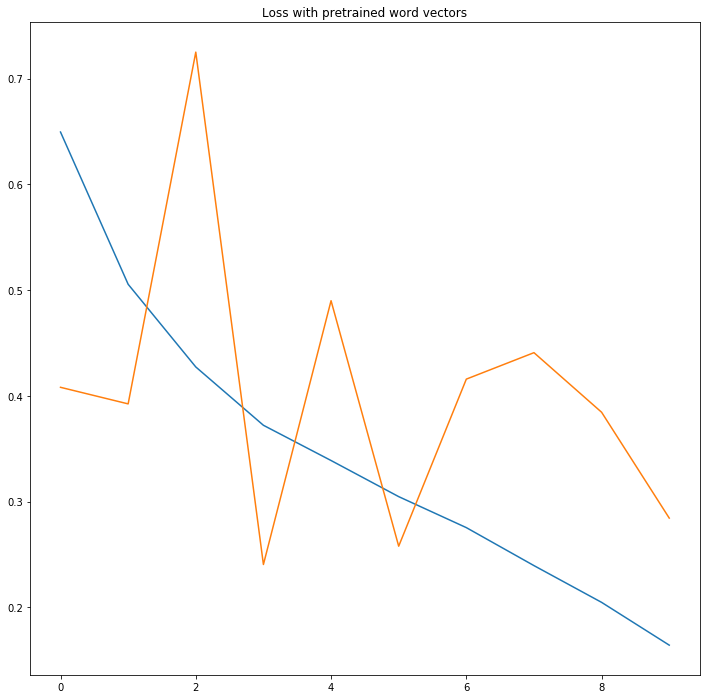

In [81]:
history = pd.DataFrame(hist.history)
plt.figure(figsize=(12,12));
plt.plot(history["loss"]);
plt.plot(history["val_loss"]);
plt.title("Loss with pretrained word vectors");
plt.show();